In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=16e412100f28e09225c2b19751ee7e98


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.88112210940963 -124.71185863780235
7.000884993623913 117.79408831517674
27.129547584145413 -86.96015302729103
43.54789419314747 -167.57662128797605
2.802127284105808 -100.50469478368034
-27.51224956484735 102.40045443205423
9.226504589966979 -115.63736236515142
36.10003837389303 -127.09923622510975
-58.86147235564681 -46.64688109595946
-50.7039778815309 -51.299729306695326
5.080556440809914 -39.69513239271737
-48.04058067911808 84.61734110415898
-86.71103790177456 -150.64326900612033
-69.61652950314277 -113.66762723041386
-14.522184669518154 151.5421901968433
-22.201160123362172 21.80600473334013
73.97204404227114 -9.524917316044593
36.23294517516784 -44.038285318551345
35.27727256671541 -158.4767126761522
-31.884503366476267 -175.03466151715517
22.933559925456265 -2.4446810439096396
11.690048835921672 118.12808063768085
-72.43856391273142 -39.81633457042946
-50.641380673192614 72.56589000081686
55.154050386184736 139.66915514699434
2.2815634448456024 -110.90900732819314
12.34751081

15.61522236074947 151.29784473351606
-68.36153525259428 -18.39712165040305
-78.0139868485775 -162.2567087550256
67.35377363350028 -72.4806374054633
-31.294266458784655 4.736057950687211
1.036761056907622 -44.84803961951195
74.36942219639653 150.6352071802495
-59.80266679512994 -30.001585783054594
-10.107581538230377 148.4354519265783
-83.5020690075684 -131.09532085634552
-72.21394509597526 -70.9530017444834
-79.48570356642284 164.8567908428231
75.28830457933651 73.12642382644506
-53.26011129626034 128.04076332302674
-60.46081640345108 -129.76086504658537
66.12229964461727 -84.86183005306711
6.609485551246706 -170.24567504593392
71.0284557810426 37.959436147255076
-21.709239316753923 105.542416180229
52.541832692921645 4.207543422660422
-6.657962296048495 140.04733767981685
29.452869888002212 -179.5012558310193
-53.141443147735664 45.988976921799804
-7.649748963988884 -127.84022034483982
-22.14875034296722 -121.85527397235083
82.07069498051061 25.257633540271684
35.10465477362176 -176.6

73.96319911886664 22.311703548006108
15.677677731984815 152.23300699110587
26.080242965745697 -7.009417449753073
-69.01197047709928 -26.4096115768657
-58.84601197020508 172.72221232466813
86.11690657221877 53.352833168441265
88.9843032669813 -110.15153582310137
50.025497769195454 -48.13364983928048
69.9006721854625 34.5653053098946
28.293289552802094 -43.93373630490345
43.03386575448164 67.02948179955837
-82.06086795996366 145.12185513359384
85.39500426074756 -54.851550215174484
1.1862637861553793 -90.85934504497997
-25.482411318249234 149.93764295156774
42.98237189956498 138.27517459779972
76.05713270706505 146.99025149070883
20.12438099504901 93.84155341769343
35.35249281408221 -63.22593720206444
-3.76390753684349 45.35414669789728
-85.42011996391832 -119.33377019727364
-72.95342310834656 -105.84268290371809
64.85809264756327 38.10433070623819
-11.320507668078008 -130.2912604601367
20.351914343027644 -2.1685554249888526
-18.919558487738882 -19.176380569975862


In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | astoria
Processing Record 2 of Set 1 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 3 of Set 1 | warrington
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | pacifica
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | samarai
Processing Record 16 of Set 1 | ghanzi
Processing Record 17 of Set 1 | husavik
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | taoudenni
Processing Record 22 of Set 1 | bacuit
City

Processing Record 32 of Set 4 | marcona
City not found. Skipping...
Processing Record 33 of Set 4 | tungkang
City not found. Skipping...
Processing Record 34 of Set 4 | bowen
Processing Record 35 of Set 4 | beloha
Processing Record 36 of Set 4 | plettenberg bay
Processing Record 37 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 38 of Set 4 | porto belo
Processing Record 39 of Set 4 | salekhard
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | miles city
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | tra vinh
Processing Record 46 of Set 4 | guadalupe
Processing Record 47 of Set 4 | talcahuano
Processing Record 48 of Set 4 | rio gallegos
Processing Record 49 of Set 4 | sao felix do xingu
Processing Record 50 of Set 4 | stepnyak
Processing Record 1 of Set 5 | peniche
Processing Record 2 of Set 5 | lolua
City not found. Skipping...
Pro

Processing Record 23 of Set 8 | zandvoort
Processing Record 24 of Set 8 | kiunga
Processing Record 25 of Set 8 | longyearbyen
Processing Record 26 of Set 8 | barcelos
Processing Record 27 of Set 8 | maghama
City not found. Skipping...
Processing Record 28 of Set 8 | matara
Processing Record 29 of Set 8 | messina
Processing Record 30 of Set 8 | ouesso
Processing Record 31 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | ulaangom
Processing Record 34 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 35 of Set 8 | dire
Processing Record 36 of Set 8 | bayan
Processing Record 37 of Set 8 | shiyan
Processing Record 38 of Set 8 | mentok
City not found. Skipping...
Processing Record 39 of Set 8 | moron
Processing Record 40 of Set 8 | batemans bay
Processing Record 41 of Set 8 | santiago del estero
Processing Record 42 of Set 8 | palmer
Processing Record 43 of Set 8 | jiazi
Processing Record 44 of Se

Processing Record 11 of Set 12 | puerto leguizamo
Processing Record 12 of Set 12 | gazojak
Processing Record 13 of Set 12 | ushtobe
Processing Record 14 of Set 12 | qom
Processing Record 15 of Set 12 | sabha
Processing Record 16 of Set 12 | batamshinskiy
Processing Record 17 of Set 12 | hailar
Processing Record 18 of Set 12 | skibbereen
Processing Record 19 of Set 12 | poum
Processing Record 20 of Set 12 | fort nelson
Processing Record 21 of Set 12 | rosita
Processing Record 22 of Set 12 | zhigansk
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | seoul
Processing Record 25 of Set 12 | kazachinskoye
Processing Record 26 of Set 12 | shimoda
Processing Record 27 of Set 12 | murray bridge
Processing Record 28 of Set 12 | kushiro
Processing Record 29 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 30 of Set 12 | sinnamary
Processing Record 31 of Set 12 | fortuna foothills
Processing Record 32 of Set 12 | daru
Processing Record 33 of Set 12 | bon

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Astoria,46.1879,-123.8313,287.83,89,100,4.12,US,2022-05-25 19:47:15
1,Warrington,53.3925,-2.5802,289.21,70,20,7.20,GB,2022-05-25 19:47:15
2,Bethel,41.3712,-73.4140,297.06,50,0,4.63,US,2022-05-25 19:47:16
3,Puerto Ayora,-0.7393,-90.3518,297.13,91,67,2.68,EC,2022-05-25 19:47:17
4,Carnarvon,-24.8667,113.6333,294.95,65,100,3.93,AU,2022-05-25 19:47:17
5,Cabo San Lucas,22.8909,-109.9124,301.82,53,0,4.12,MX,2022-05-25 19:47:18
6,Pacifica,37.6138,-122.4869,309.62,68,40,4.63,US,2022-05-25 19:42:39
7,Ushuaia,-54.8000,-68.3000,279.94,81,40,17.49,AR,2022-05-25 19:47:19
8,Mar Del Plata,-38.0023,-57.5575,287.09,66,40,5.14,AR,2022-05-25 19:47:19
9,Acarau,-2.8856,-40.1200,299.71,84,14,3.98,BR,2022-05-25 19:47:20


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Astoria,US,2022-05-25 19:47:15,46.1879,-123.8313,287.83,89,100,4.12
1,Warrington,GB,2022-05-25 19:47:15,53.3925,-2.5802,289.21,70,20,7.20
2,Bethel,US,2022-05-25 19:47:16,41.3712,-73.4140,297.06,50,0,4.63
3,Puerto Ayora,EC,2022-05-25 19:47:17,-0.7393,-90.3518,297.13,91,67,2.68
4,Carnarvon,AU,2022-05-25 19:47:17,-24.8667,113.6333,294.95,65,100,3.93
...,...,...,...,...,...,...,...,...,...
548,Zhanakorgan,KZ,2022-05-25 20:04:53,43.9098,67.2495,298.97,28,0,6.21
549,Biloela,AU,2022-05-25 20:00:20,-24.4167,150.5000,288.93,90,19,3.87
550,Iwanai,JP,2022-05-25 20:04:53,42.9744,140.5089,286.82,77,12,3.07
551,Onega,RU,2022-05-25 20:04:54,63.9061,38.1404,274.80,95,9,2.63


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Plot Latitude vs. Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

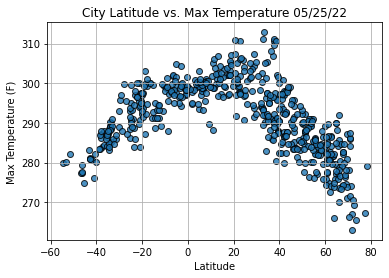

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

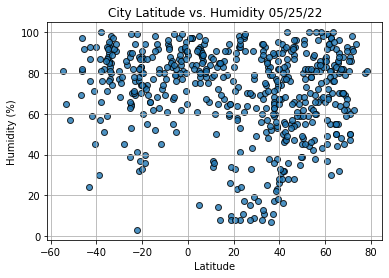

In [16]:
#Plot Latitude vs. Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

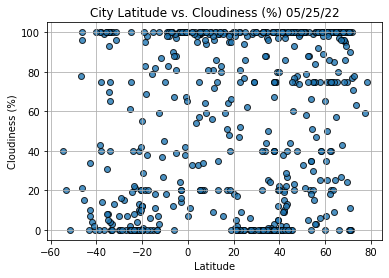

In [17]:
#Plot Latitude vs. Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

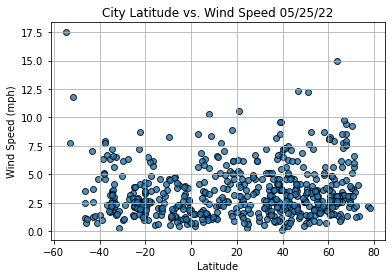

In [18]:
#Plot Latitude vs. Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
#Create a Linear Regression Function

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
#all the information at index 13 of the city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                      Samarai
Country                        PG
Date          2022-05-25 19:47:23
Lat                      -10.6167
Lng                      150.6667
Max Temp                   299.29
Humidity                       80
Cloudiness                     45
Wind Speed                   3.63
Name: 13, dtype: object

In [22]:
#get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
548     True
549    False
550     True
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [23]:
#return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Astoria,US,2022-05-25 19:47:15,46.1879,-123.8313,287.83,89,100,4.12
1,Warrington,GB,2022-05-25 19:47:15,53.3925,-2.5802,289.21,70,20,7.20
2,Bethel,US,2022-05-25 19:47:16,41.3712,-73.4140,297.06,50,0,4.63
5,Cabo San Lucas,MX,2022-05-25 19:47:18,22.8909,-109.9124,301.82,53,0,4.12
6,Pacifica,US,2022-05-25 19:42:39,37.6138,-122.4869,309.62,68,40,4.63


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

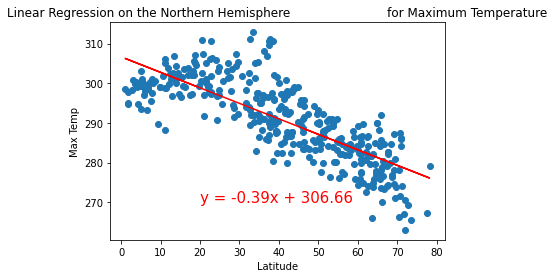

In [42]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(20,270))

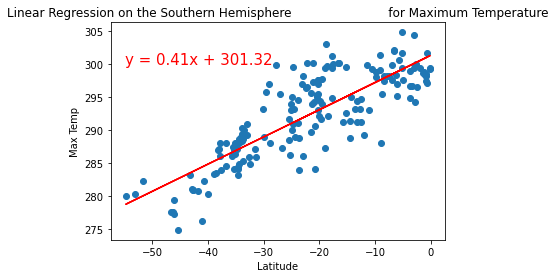

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,300))

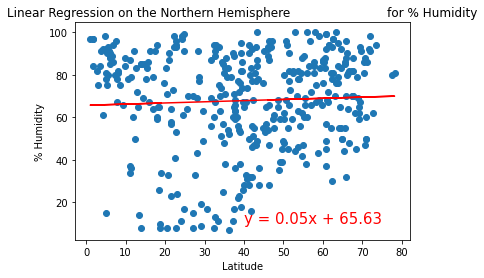

In [44]:
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

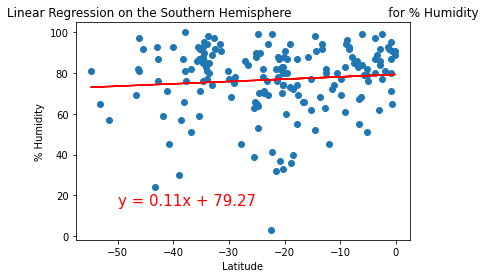

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

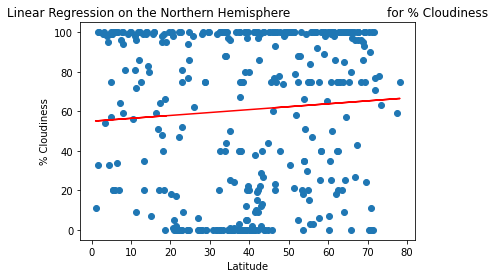

In [46]:
#Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

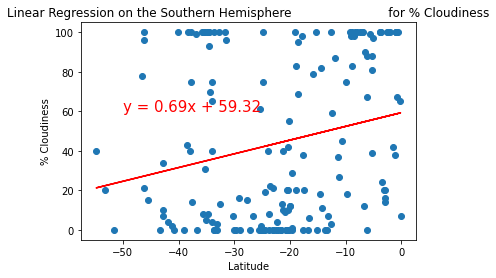

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

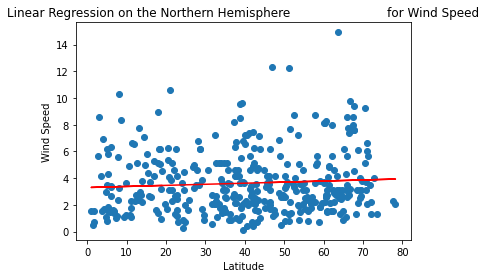

In [48]:
#Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

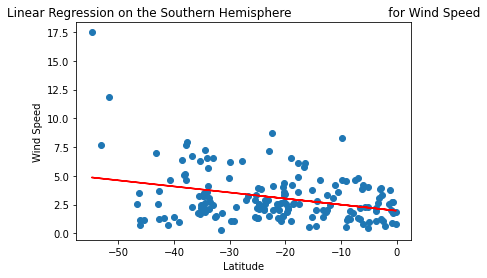

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))